# AI Lab: Blokus


## Tile Detection


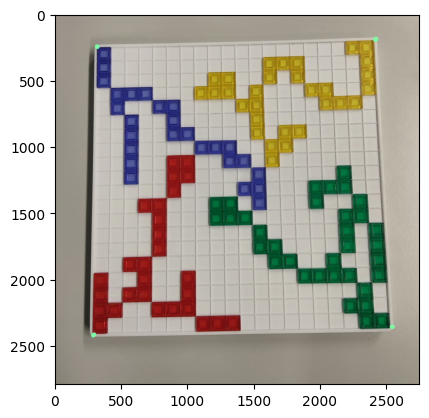

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = "readme_files/input.png"

image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### Board Segmentation



0: 640x640 1 board, 569.4ms
Speed: 15.5ms preprocess, 569.4ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


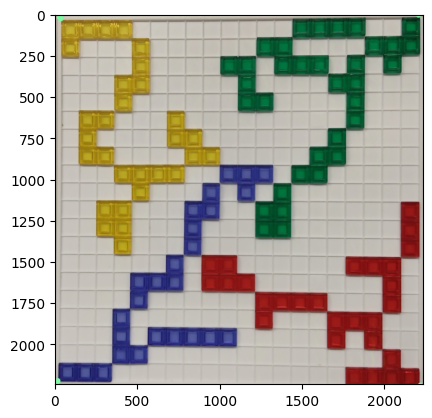

In [2]:
from src.detection import board_seg


img = image.copy()
img = cv2.bilateralFilter(img, 9, 75, 75)
img_segmented = board_seg.board_seg_by_model(img, "models/board_seg.pt")
plt.imshow(cv2.cvtColor(img_segmented, cv2.COLOR_BGR2RGB))

In [3]:
import gradio as gr

wrapper = [img_segmented]

def predict(res):
    wrapper.append(res["composite"])
    return wrapper[-1]

with gr.Blocks() as demo:
    with gr.Row():
        im = gr.ImageEditor(
            value=wrapper[-1],
            type="numpy",
            crop_size="1:1",
        )
        im_preview = gr.Image()
    im.change(predict, outputs=im_preview, inputs=im, show_progress="hidden")

demo.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


### Image Normalization


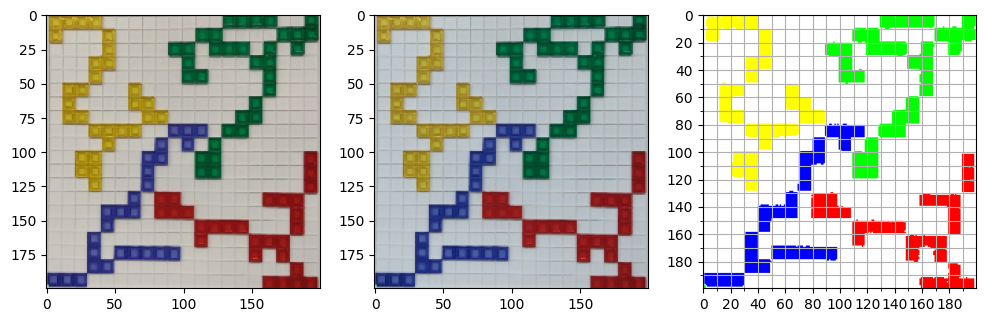

In [4]:
from src.detection import normalization

img_segmented = wrapper[-1]

fig, axes = plt.subplots(1, 3, figsize=(12, 12))

img = cv2.resize(img_segmented, (200, 200))
ax = axes[0]
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

img = normalization.__color_correction(img)
ax = axes[1]
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

rgyb_thres = (167, 107, 167, 97)
img_normalized = normalization.__color_mapping(img, rgyb_thres)
ax = axes[2]
major_ticks = np.arange(0, 201, 20)
minor_ticks = np.arange(0, 201, 10)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which="both")
ax.imshow(cv2.cvtColor(img_normalized, cv2.COLOR_BGR2RGB))

### Split Image into Grid

Counter({EMPTY: 282, GREEN: 34, YELLOW: 30, RED: 28, BLUE: 26})
EMPTY 	[0 4]	[0 5]	[0 6]	[0 7]	[0 8]	[0 9]	[ 0 10]	[ 0 11]	[ 0 12]	[ 0 17]
RED   	[10 19]	[11 19]	[12 19]	[13  8]	[13  9]	[13 16]	[13 17]	[13 18]	[14  8]	[14  9]
GREEN 	[ 0 13]	[ 0 14]	[ 0 15]	[ 0 16]	[ 0 19]	[ 1 11]	[ 1 12]	[ 1 17]	[ 1 18]	[ 1 19]
BLUE  	[8 9]	[ 8 10]	[ 8 11]	[9 8]	[ 9 10]	[10  7]	[10  8]	[11  7]	[12  7]	[13  6]
YELLOW	[0 0]	[0 1]	[0 2]	[0 3]	[1 0]	[1 4]	[2 4]	[3 3]	[3 4]	[4 3]


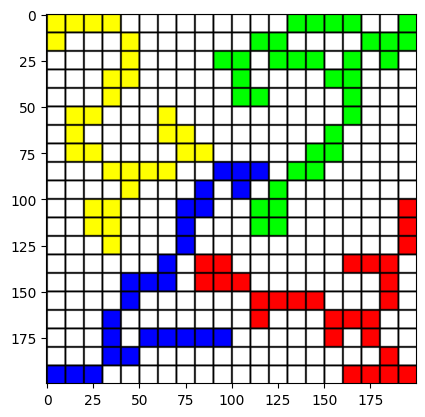

In [5]:
from src.detection import grid
from collections import Counter
from src.types.tiles import SquareColor


color_grid = grid.generate_grid(img_normalized)
print(Counter(color_grid.flatten()))
pos_dict = dict((color, np.argwhere(color_grid == color)) for color in SquareColor)
for key in pos_dict:
    print(f"{key:<6}", *pos_dict[key][:10], sep="\t")

img_grid = grid.generate_image(color_grid)
plt.imshow(cv2.cvtColor(img_grid, cv2.COLOR_BGR2RGB))

## Recommendation

In [10]:
grid_wrapper = [color_grid]

def _update_mat(mat):
    grid_wrapper.append(mat)
    img = grid.generate_image(mat)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

with gr.Blocks() as demo:
    with gr.Row():
        mat = gr.Numpy(value=grid_wrapper[-1], datatype="number", row_count=20, col_count=20, interactive=True)
        img_container = gr.Image()
    mat.input(_update_mat, outputs=img_container, inputs=mat)
demo.launch()

* Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.


In [13]:
!jupyter nbconvert --to markdown readme.ipynb

[NbConvertApp] Converting notebook readme.ipynb to markdown
[NbConvertApp] Support files will be in readme_files\
[NbConvertApp] Writing 4623 bytes to readme.md
